In [1]:
import pandas as pd

data = pd.read_csv("../Data/MAPK14_res_flexibility.csv") 

data.head()

,protein,start ligand,target ligand,rmsd,bfactor,normalized bfactor,normal variate bfactor,res name,secondary structure
0,MAPK14,3HUB,2YIX,0.788353,42.925714,1.344323,1.187425,V,0
1,MAPK14,3HUB,2YIX,1.038448,47.975000,1.502454,1.732751,G,0
2,MAPK14,3HUB,2YIX,1.185330,44.707500,1.400124,1.379859,Y,0
3,MAPK14,3HUB,2YIX,0.718006,31.604286,0.989765,-0.035296,V,2
4,MAPK14,3HUB,2YIX,0.528519,29.262000,0.916411,-0.288264,A,2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['bfactor'], data['rmsd'], alpha=0.1)
x_avg, y_avg = weighted_moving_average(data['bfactor'], data['rmsd'], step_size=2.5, width=5)
plt.plot(x_avg, y_avg, 'o-', color='r')    
plt.title('MAPK14 bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

<Figure size 640x480 with 1 Axes>

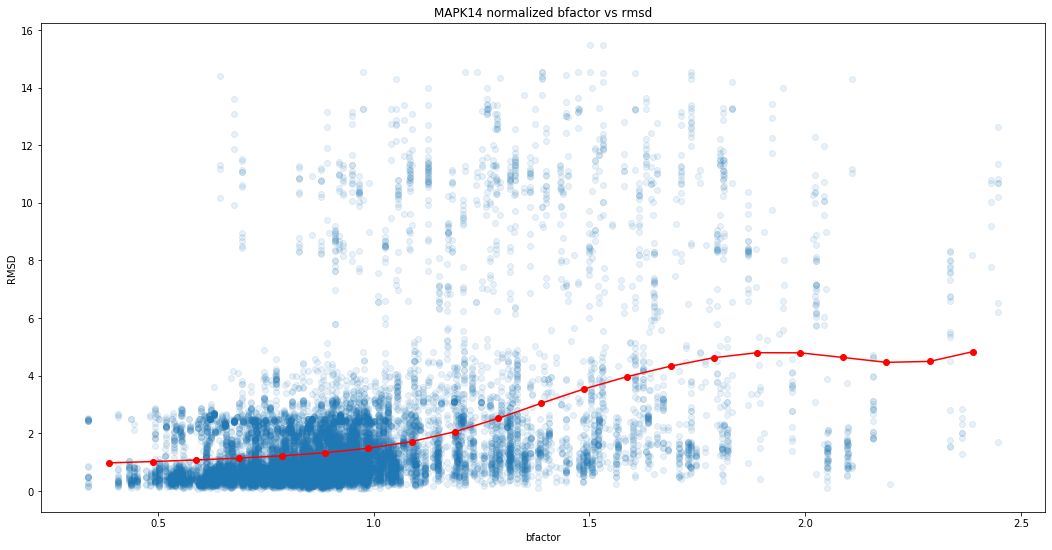

In [4]:
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['normalized bfactor'], data['rmsd'], alpha=0.1)
x_avg_norm, y_avg_norm = weighted_moving_average(data['normalized bfactor'], data['rmsd'], step_size=0.1, width=0.2)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('MAPK14 normalized bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

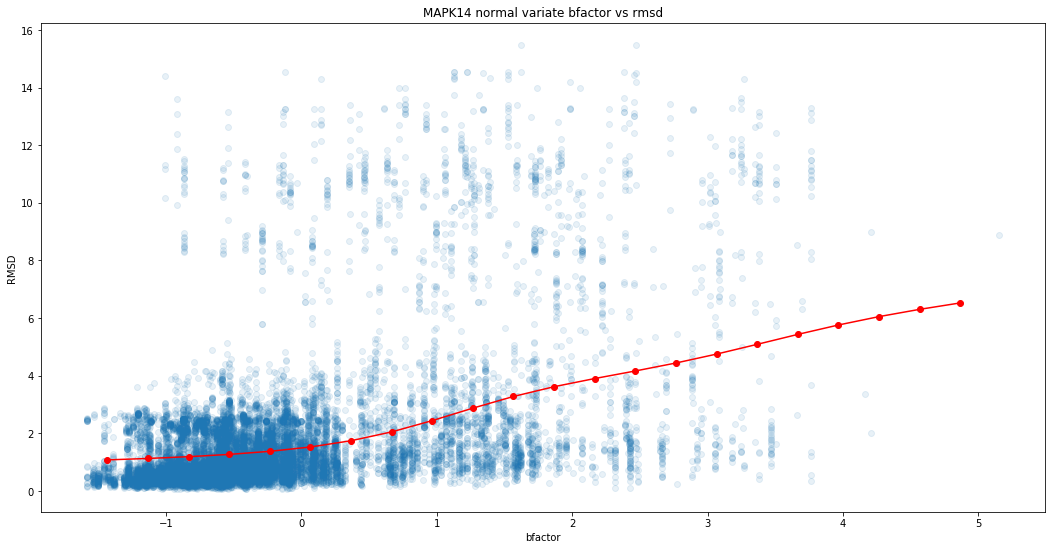

In [5]:
plt.scatter(data['normal variate bfactor'], data['rmsd'], alpha=0.1)
x_avg_norm, y_avg_norm = weighted_moving_average(data['normal variate bfactor'], data['rmsd'], step_size=0.3, width=0.75)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('MAPK14 normal variate bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

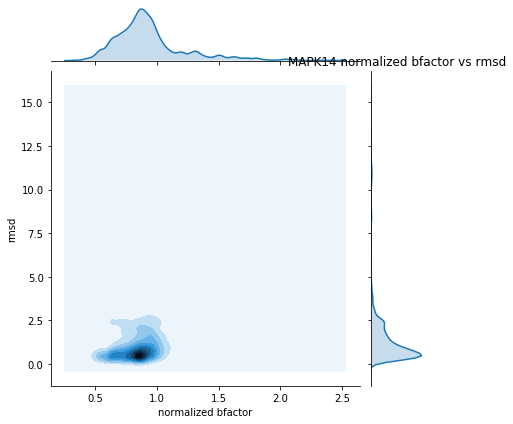

In [6]:
import seaborn as sns
g = sns.jointplot(x='normalized bfactor', y='rmsd', data=data, kind='kde')
plt.title('MAPK14 normalized bfactor vs rmsd')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

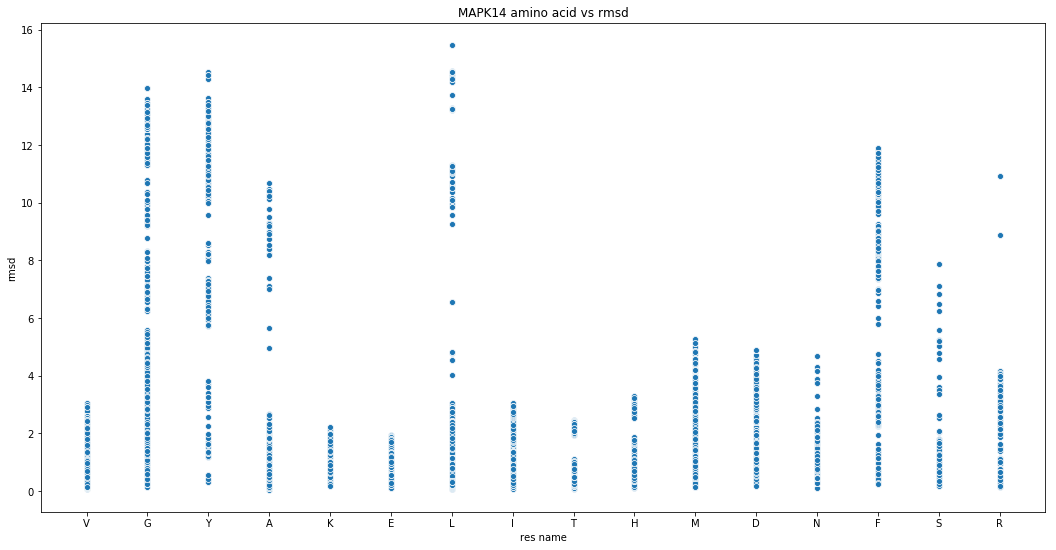

In [8]:
g = sns.scatterplot(x='res name', y='rmsd', data=data)
plt.title('MAPK14 amino acid vs rmsd')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

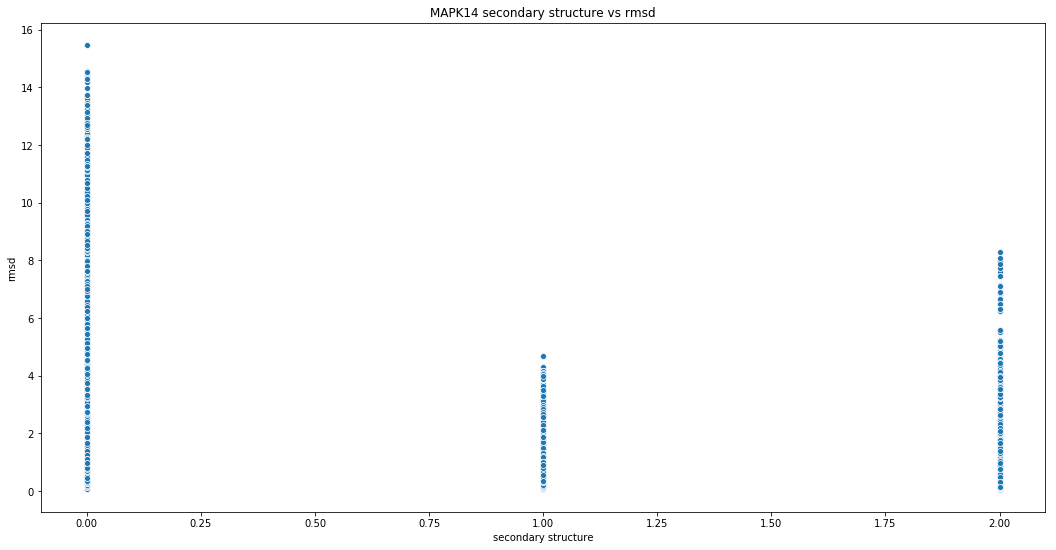

In [9]:
g = sns.scatterplot(x='secondary structure', y='rmsd', data=data)
plt.title('MAPK14 secondary structure vs rmsd')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

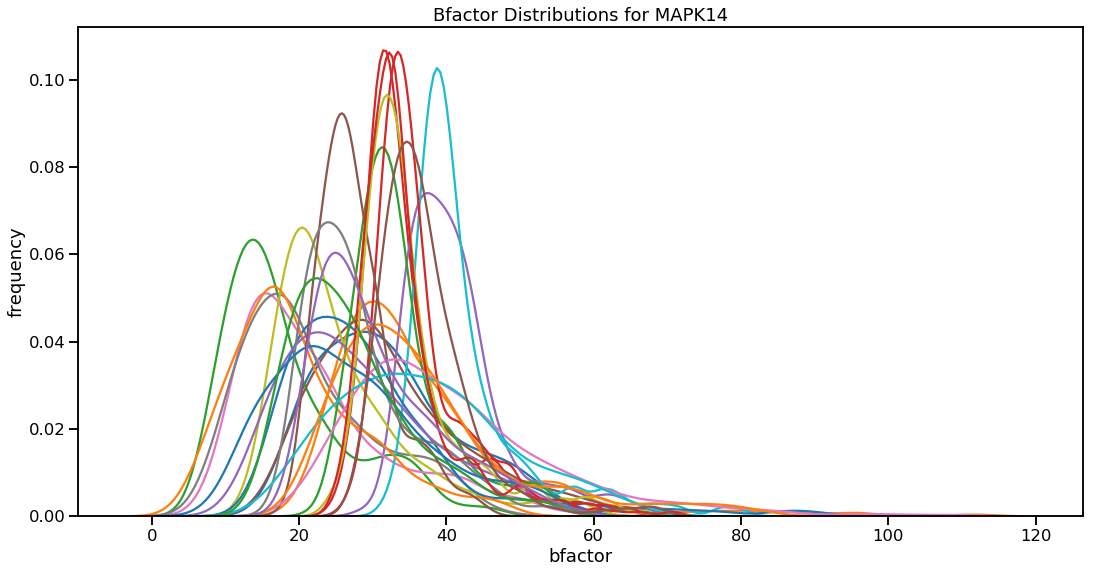

In [8]:
import pickle
sns.set_context("talk", font_scale=1.0)
infile = open('../Data/MAPK14_ASL_to_resinfo_dict', 'rb')
ASL_to_feature = pickle.load(infile)
infile.close()


for protein in ASL_to_feature:
    for ligand in ASL_to_feature[protein]:
        bfactors = []
        for asl in ASL_to_feature[protein][ligand]:
            bfactors.append(ASL_to_feature[protein][ligand][asl][0])
        sns.distplot(bfactors, hist=False);
plt.title('Bfactor Distributions for MAPK14')
plt.xlabel('bfactor')
plt.ylabel('frequency')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.show()

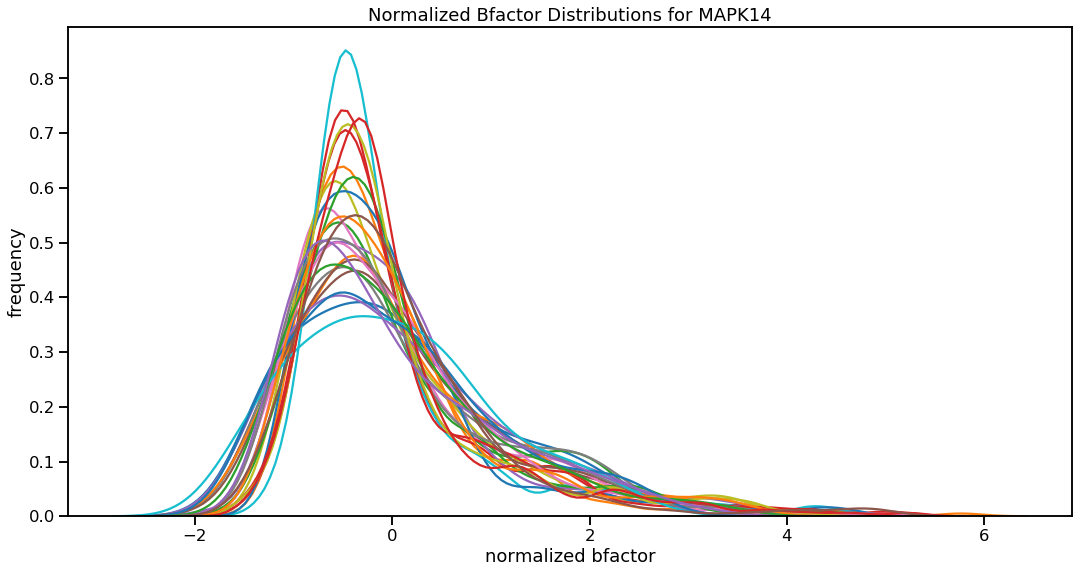

In [9]:
for protein in ASL_to_feature:
    for ligand in ASL_to_feature[protein]:
        bfactors = []
        for asl in ASL_to_feature[protein][ligand]:
            bfactors.append(ASL_to_feature[protein][ligand][asl][2])
        sns.distplot(bfactors, hist=False);
plt.title('Normalized Bfactor Distributions for MAPK14')
plt.xlabel('normalized bfactor')
plt.ylabel('frequency')
plt.show()